In [61]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [62]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform =ToTensor()
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform =ToTensor()
)

In [63]:
test_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [64]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [65]:
import matplotlib.pyplot as plt

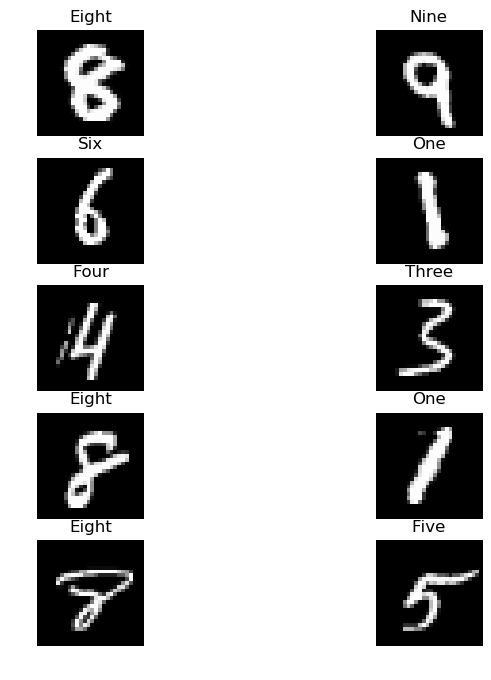

In [66]:
labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "Nine",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 2, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [67]:
torch.cuda.is_available()

False

In [68]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [121]:
# Define model
class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
#         self.flatten = nn.Flatten()
        self.conv1 = nn.Conv2d(1, 25, 5)
        self.maxpool1 = nn.MaxPool2d(2, stride=2, padding=1)
    
    
        self.conv2 = nn.Conv2d(25, 50, 5)
        self.maxpool2 = nn.MaxPool2d(2, stride=2, padding=1)
        
        self.hiddenLayer1 = nn.Linear(50*5*5, 120)
        self.hiddenLayer2 = nn.Linear(120, 84)
        self.relu = nn.ReLU()
        self.outputLayer = nn.Linear(84, 10)

    def forward(self, x):
#         x = self.flatten(x)
        x = self.maxpool1(self.relu(self.conv1(x)))
        x = self.maxpool2(self.relu(self.conv2(x)))
        x = x.view(-1, 50*5*5)
        x = self.relu(self.hiddenLayer1(x))
        x = self.relu(self.hiddenLayer2(x))
        x = self.outputLayer(x)
        return x

#model = NeuralNetwork().to(device)
#model = torch.load('mnist from pytorch.pth')
#print(model)

In [152]:
#model = ConvNeuralNetwork().to(device)
model =torch.load('cnn mnist omo.pth')
print(model)

ConvNeuralNetwork(
  (conv1): Conv2d(1, 25, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Conv2d(25, 50, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (hiddenLayer1): Linear(in_features=1250, out_features=120, bias=True)
  (hiddenLayer2): Linear(in_features=120, out_features=84, bias=True)
  (relu): ReLU()
  (outputLayer): Linear(in_features=84, out_features=10, bias=True)
)


In [147]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-6)

In [139]:
torch.manual_seed(21)

In [140]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [141]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [146]:
def saveModel():
    torch.save(model, 'cnn mnist omo.pth')

In [148]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.000014  [   64/60000]
loss: 0.000000  [ 6464/60000]
loss: 0.000317  [12864/60000]
loss: 0.000011  [19264/60000]
loss: 0.000017  [25664/60000]
loss: 0.000088  [32064/60000]
loss: 0.000371  [38464/60000]
loss: 0.000025  [44864/60000]
loss: 0.000252  [51264/60000]
loss: 0.000139  [57664/60000]
Test Error: 
 Accuracy: 99.4%, Avg loss: 0.032415 

Epoch 2
-------------------------------
loss: 0.000013  [   64/60000]
loss: 0.000000  [ 6464/60000]


KeyboardInterrupt: 

# max: 99.2% on epoch 10

In [145]:
saveModel()

In [149]:
#max: 99.3 on epoch 2 with 1e-5 lr
#max: 99.4 on epoch 9 with 1e-5 lr

In [151]:
test(train_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.000293 



In [153]:
test(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 99.4%, Avg loss: 0.032384 

